<a href="https://colab.research.google.com/github/solobala/TSML13/blob/main/TSML13_DZ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по теме «Временные ряды, общая теория»
Преподаватель: Даниил Корбут, Наталья Баданина
Задание

Скачайте материалы к занятию.
Проанализируйте ряды и сделайте их стационарными.
Пришлите решение в виде ссылки на GitHub с ноутбуком.

нужно проанализировать 6 временных рядов:

* “monthly-sales-of-company-x-jan-6.csv”,
*  “monthly-boston-armed-robberies-j.csv”,
*  “international-airline-passengers.csv”,
*  “mean-monthly-air-temperature-deg.csv”,
*  “weekly-closings-of-the-dowjones-.csv”,
*  "daily-total-female-births-in-cal.csv"

# Импорт библиотек и пользовательские функции

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from zipfile import ZipFile
from google.colab import drive
from google.colab import files
import os
from glob import glob
from pathlib import Path
%matplotlib inline

In [2]:
def test_stationarity(timeseries):
  """Применение теста Дики-Фуллера"""
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  counts = 0
  for [key, value] in dftest[4].items():
      dfoutput['Critical Value (%s)' % key] = value
      if dftest[0] < value:
        print(f'Отвергаем нулевую гипотезу, на уровне значимости {key} ряд можно считать стационарным')
        counts += 1
      else:
        print(f'Не отвергаем нулевую гипотезу, на уровне значимости {key} ряд, вероятно, нестационарен')
  if dftest[1] > 0.05:
    print('Вывод: ряд, вероятно, нестационарен')
    result = False
  elif (dftest[1] < 0.05) and (counts < 3):
    print('Вывод: ряд, вероятно, нестационарен')
    result = False
  elif (dftest[1] < 0.05) and (counts == 3):
    print('Вывод: отклоняем нулевую гипотезу, ряд стационарен')
    result = True
  print(dfoutput)
  return result

In [3]:
def tsplot(y: pd.Series, lags=None, figsize=(14, 8), style='bmh') -> None:
    """Применение  теста Дики-Фуллера и построение графиков ts, acf, pacf
    Args:
      y : pd.Series - временной ряд
      lags: временные лаги, относительно которых выполняется исследование"""
    # тест Дики-Фуллера
    result = test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        # построение графиков
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return result

# 1. Загрузка данных

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir '/content/drive/MyDrive/TSML13_DZ1'

mkdir: cannot create directory ‘/content/drive/MyDrive/TSML13_DZ1’: File exists


In [ ]:
! wget https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_tsml.zip

--2023-11-15 14:17:36--  https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_tsml.zip
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 769056 (751K) [application/x-zip-compressed]
Saving to: ‘1._Лекция_tsml.zip’

1._Лекция_tsml.zip  100%[===================>] 751.03K   692KB/s    in 1.1s    

2023-11-15 14:17:38 (692 KB/s) - ‘1._Лекция_tsml.zip’ saved [769056/769056]



In [5]:
ROOT = '/content/drive/MyDrive/TSML13_DZ1'
SERIES = Path(ROOT, 'Series')
good_ts_names = []

In [ ]:
with ZipFile('/content/1._Лекция_tsml.zip', 'r') as zip_file:
     zip_file.extractall(path='/content/drive/MyDrive/TSML13_DZ1')

In [6]:
time_series = dict()
for path in glob(f'{SERIES}/*.csv'):
    # path - Это абсолютный путь к csv-файлам
    file_name = os.path.basename(path)
    time_series[file_name] = pd.read_csv(Path(SERIES, file_name))

In [7]:
time_series.keys()

dict_keys(['daily-total-female-births-in-cal.csv', 'international-airline-passengers.csv', 'mean-monthly-air-temperature-deg.csv', 'monthly-boston-armed-robberies-j.csv', 'monthly-sales-of-company-x-jan-6.csv', 'weekly-closings-of-the-dowjones-.csv'])

In [8]:
for key, value in time_series.items():
  time_series[key].rename(columns={time_series[key].columns[1]: "Value"}, inplace=True)

# 2. Проверка гипотезы о стационарности ряда
Тест Дики-Фуллера является средством проверки стационарности временного ряда.
стационарность ряда оценивается при выбранном уровне значимости.
Нулевая гипотеза HO: r(t)=0, ряд, вероятно, нестационарен
Альтернативная гипотеза H1: r(t) !=0, ряд стационарен
Отвергаем H0 на N процентном (N= 1%, 5%, 10%) уровне значимости, если test Statistic < Critical Value.
Допущение: Если на всех уровнях значимости H0  удалось отвергнуть - ряд стационарен. В противном случае ряд нестационарен

-----------------------------------------
daily-total-female-births-in-cal.csv
-----------------------------------------
Results of Dickey-Fuller Test:
Отвергаем нулевую гипотезу, на уровне значимости 1% ряд можно считать стационарным
Отвергаем нулевую гипотезу, на уровне значимости 5% ряд можно считать стационарным
Отвергаем нулевую гипотезу, на уровне значимости 10% ряд можно считать стационарным
Вывод: отклоняем нулевую гипотезу, ряд стационарен
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64
-----------------------------------------
international-airline-passengers.csv
-----------------------------------------
Results of Dickey-Fuller Test:
Не отвергаем нулевую гипотезу, на уровне значимости 1% ряд, вероятно, нестационарен
Не

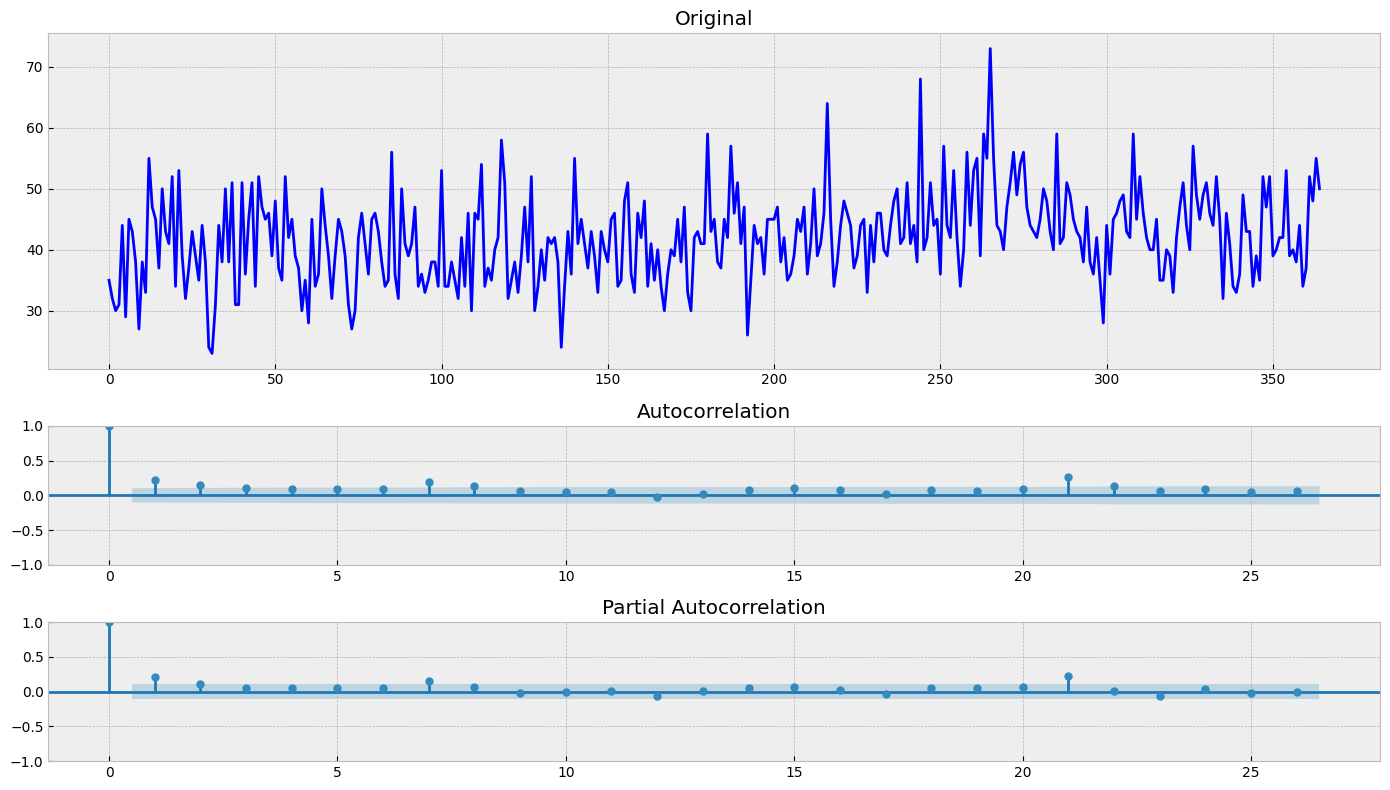

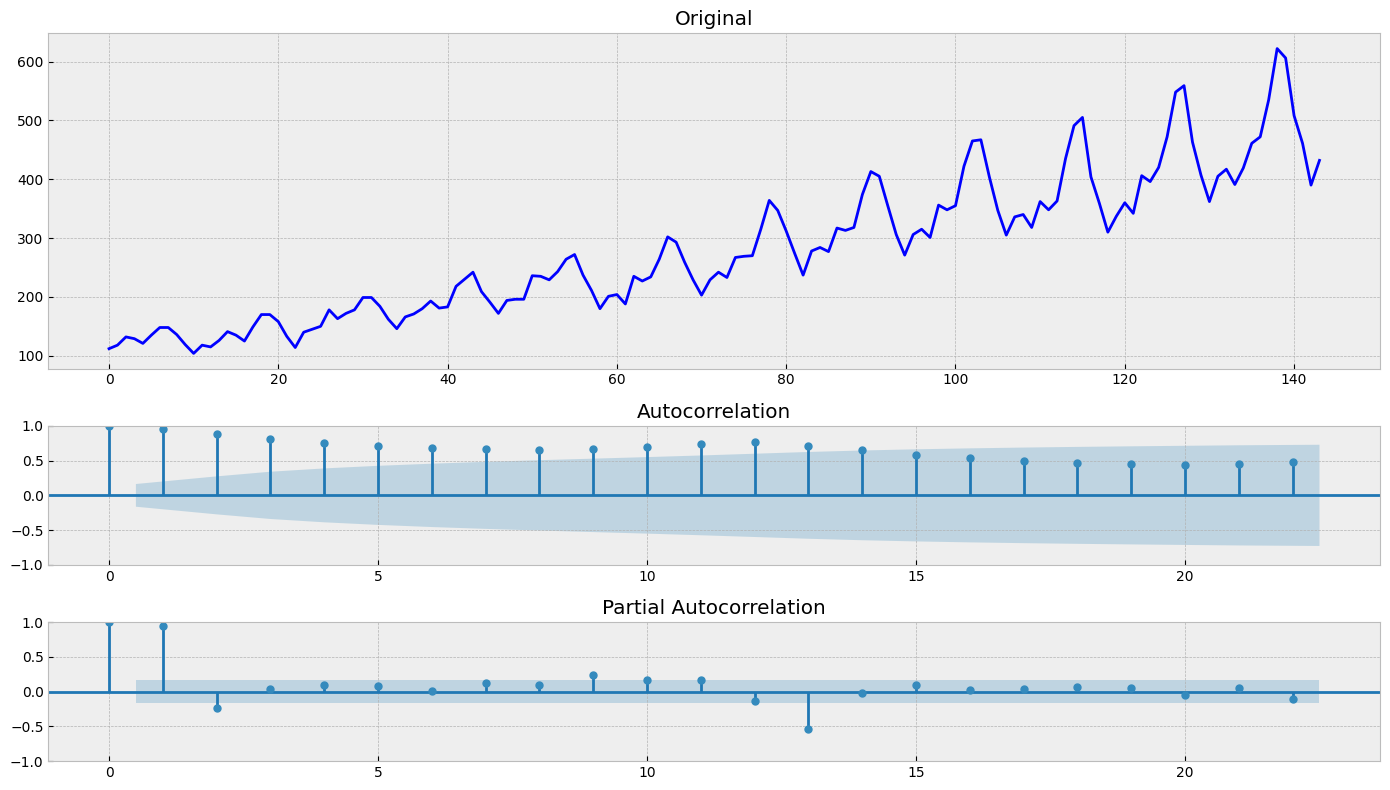

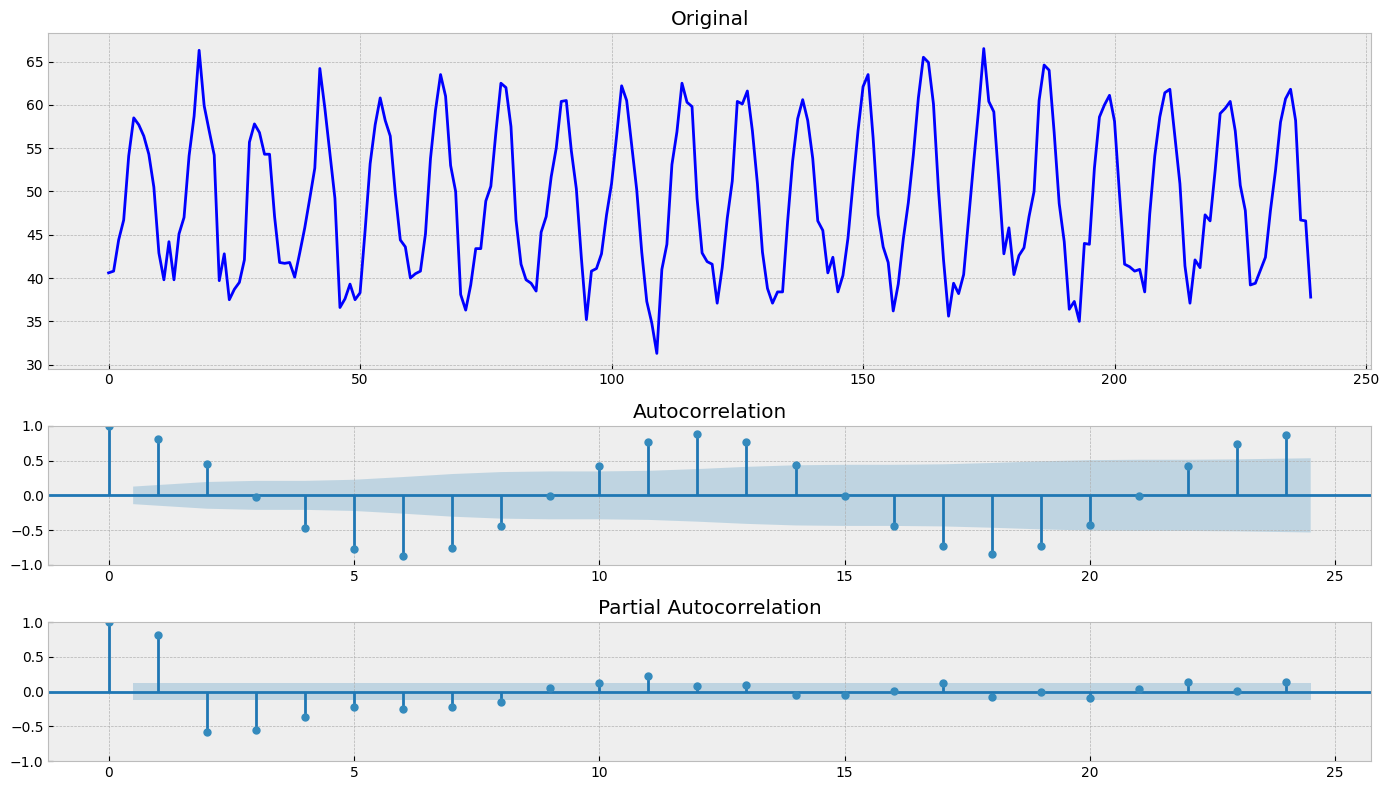

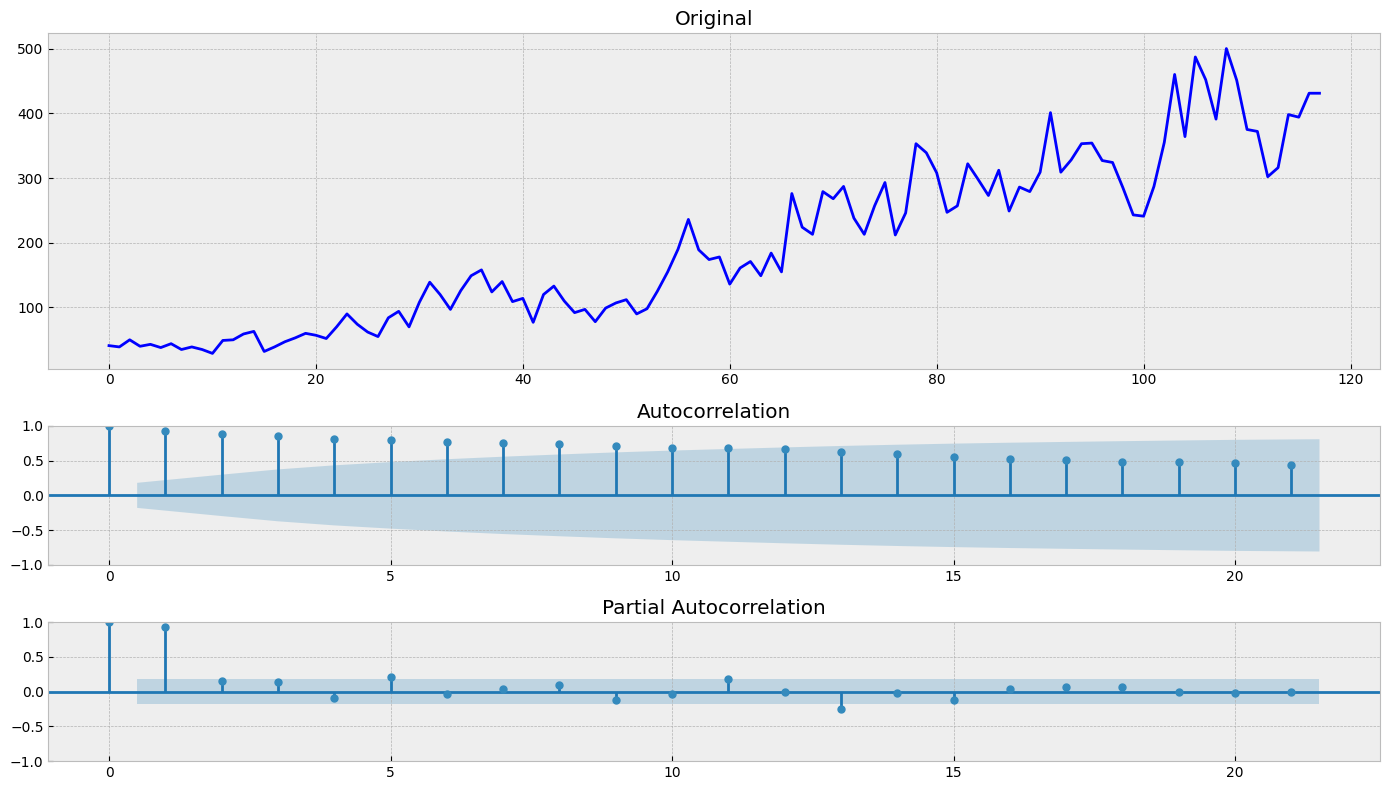

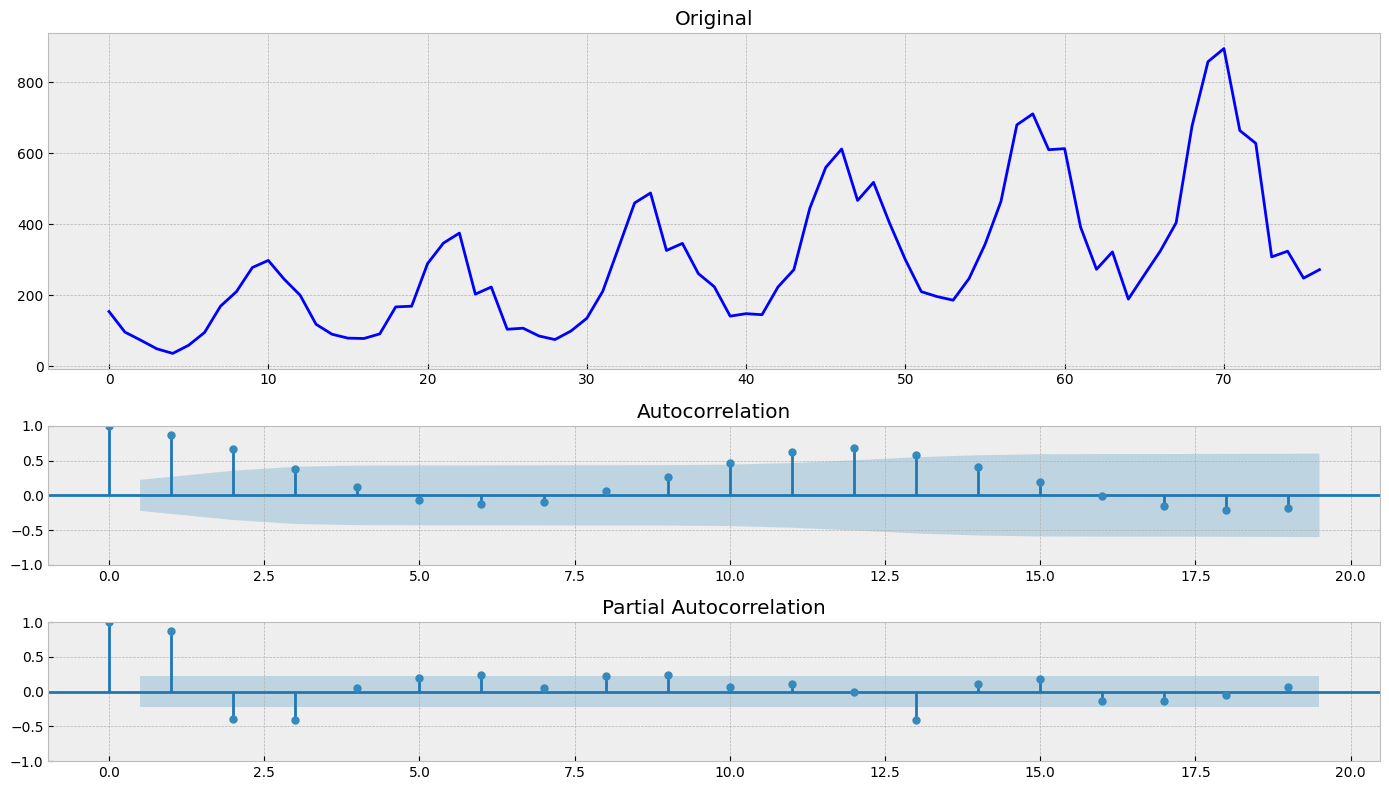

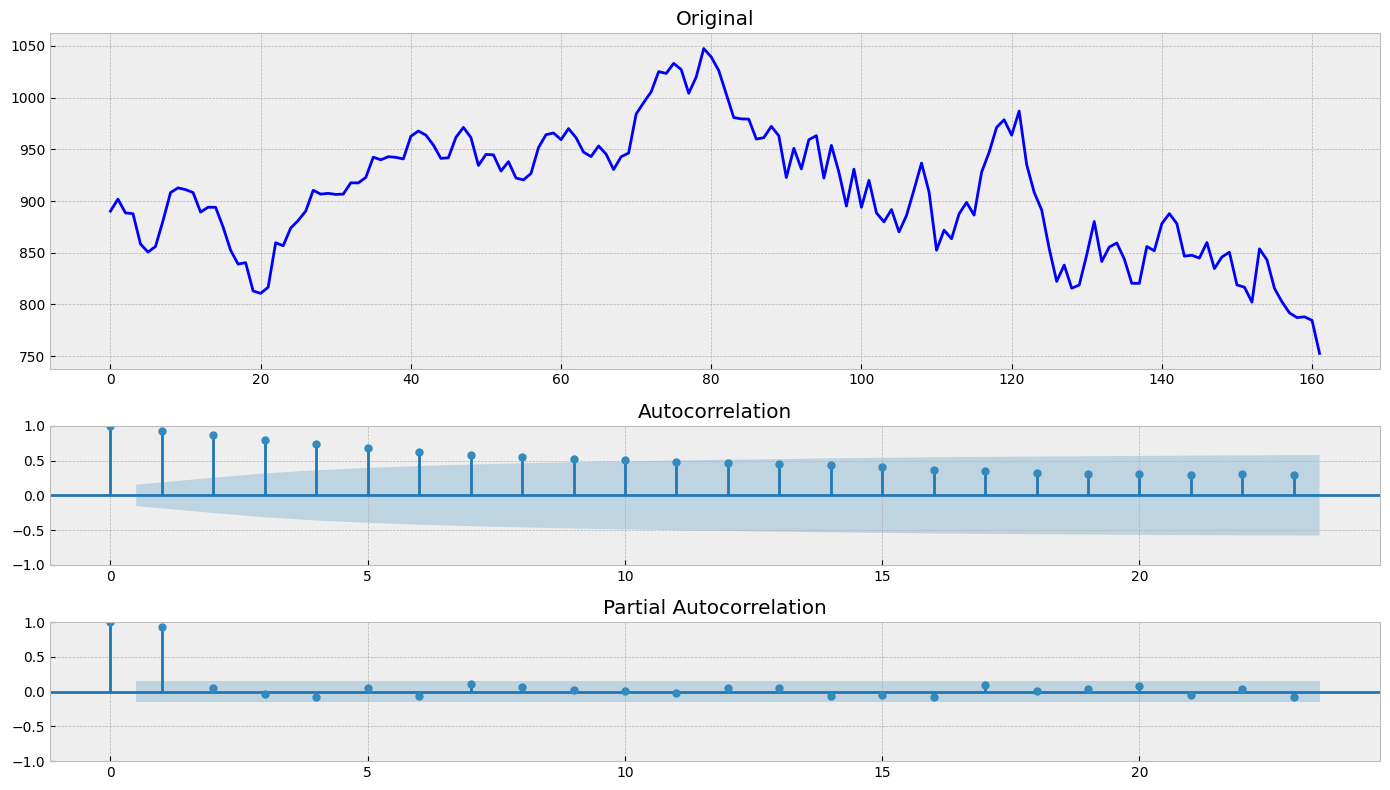

In [9]:
for key, value in time_series.items():
  series = time_series[key]['Value']
  print('-----------------------------------------')
  print(f'{key}')
  print('-----------------------------------------')
  result = tsplot(series)
  if result:
    good_ts_names.append(key)


In [10]:
good_ts_names

['daily-total-female-births-in-cal.csv']

Вывод:
1. Временной ряд 1 (Данные о рождаемости девочек в Калифорнии) - стационарен на всех уровнях значимости и не требует преобразований
2. Временные ряды Международные перевозки пассажиров, бостонские данные, ежемесячные продажи компании и еженедельные значения Доу-Джонса - нестационарны
3. Среднемесячные значения температуры можно считать стационарным врременным рядом при уровнях значимости 5 и 10%. Если требуется более высокий уровень, то ряд также нестационарен

# 3. Удаление колебаний дисперсии и повторная проверка гипотез о стационарности

-----------------------------------------
international-airline-passengers.csv
-----------------------------------------
Results of Dickey-Fuller Test:
Не отвергаем нулевую гипотезу, на уровне значимости 1% ряд, вероятно, нестационарен
Не отвергаем нулевую гипотезу, на уровне значимости 5% ряд, вероятно, нестационарен
Не отвергаем нулевую гипотезу, на уровне значимости 10% ряд, вероятно, нестационарен
Вывод: ряд, вероятно, нестационарен
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
-----------------------------------------
mean-monthly-air-temperature-deg.csv
-----------------------------------------
Results of Dickey-Fuller Test:
Отвергаем нулевую гипотезу, на уровне значимости 1% ряд можно считать стационарным
Отвергаем нулев

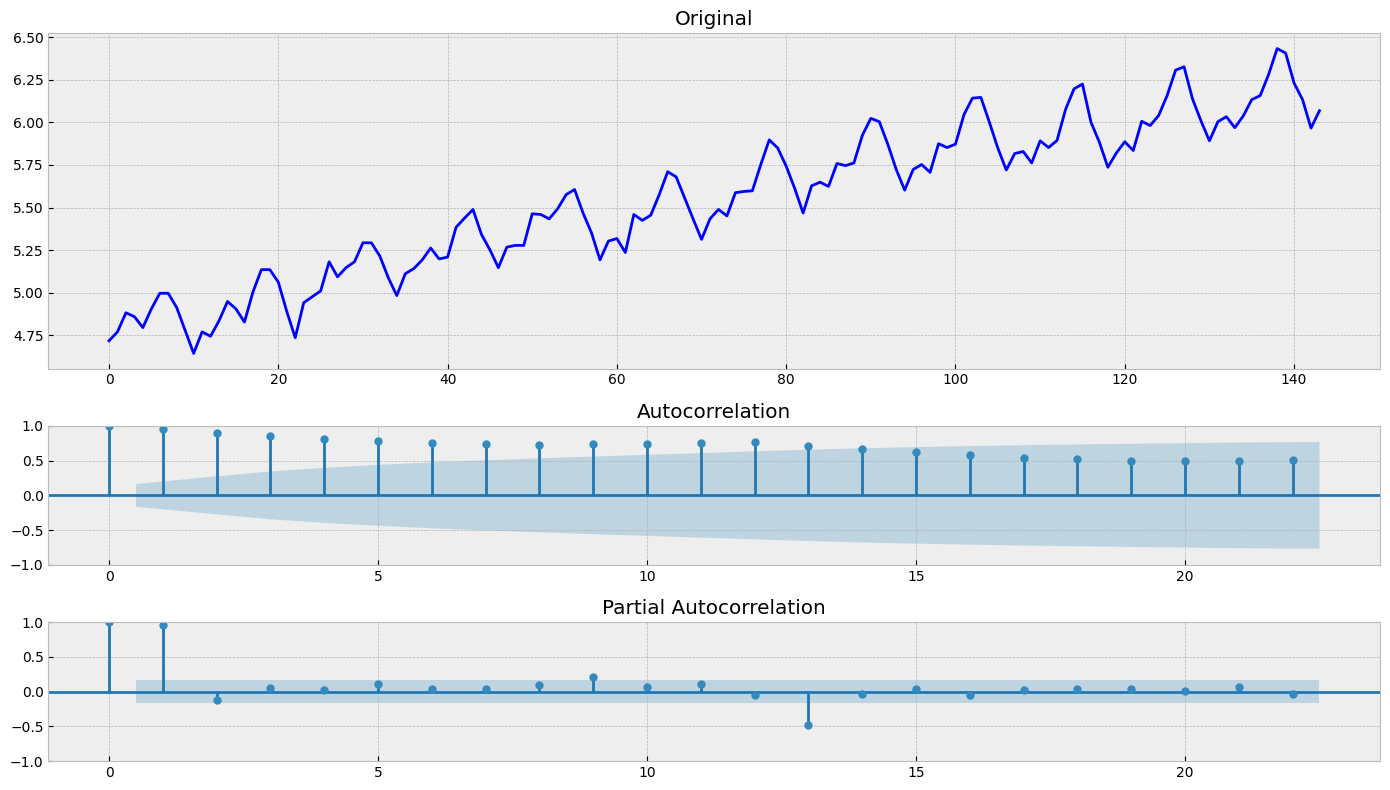

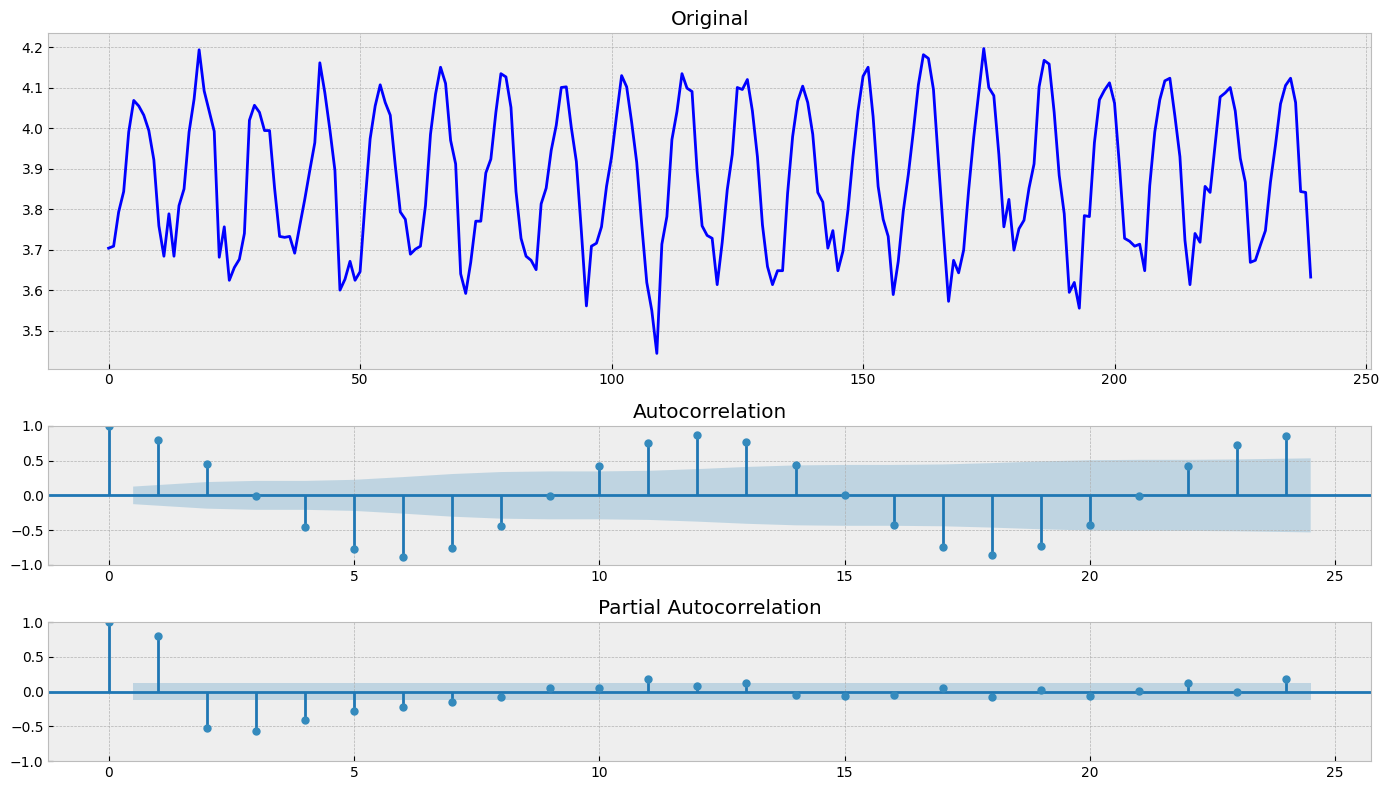

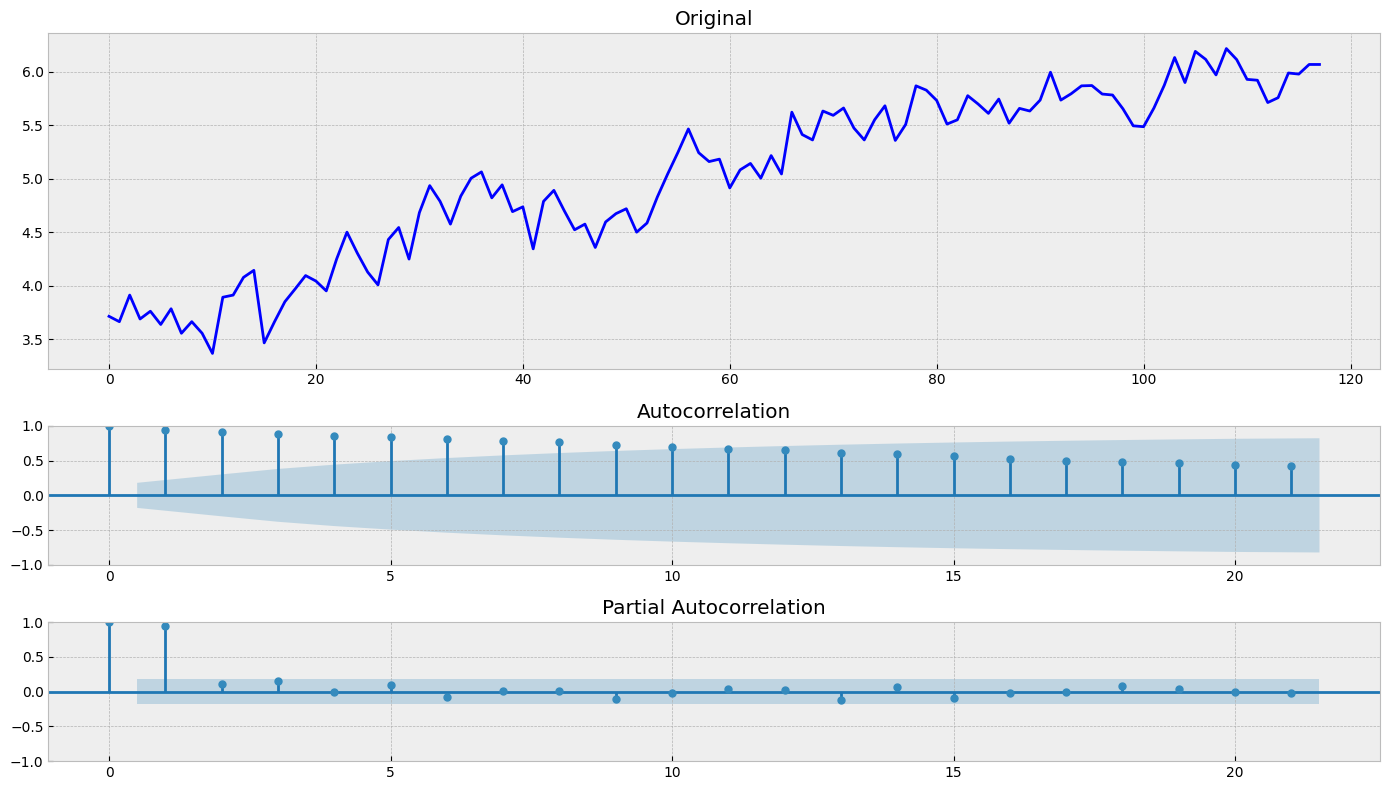

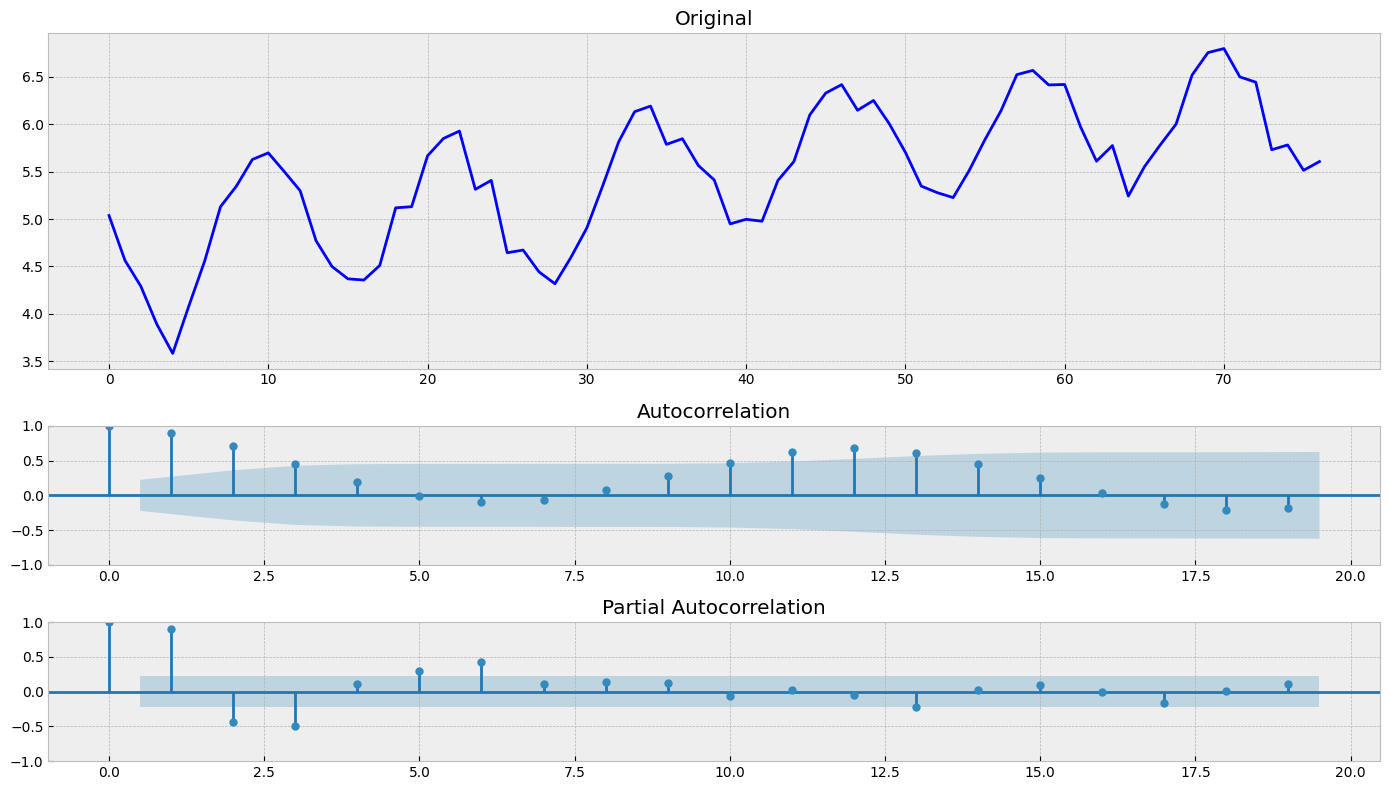

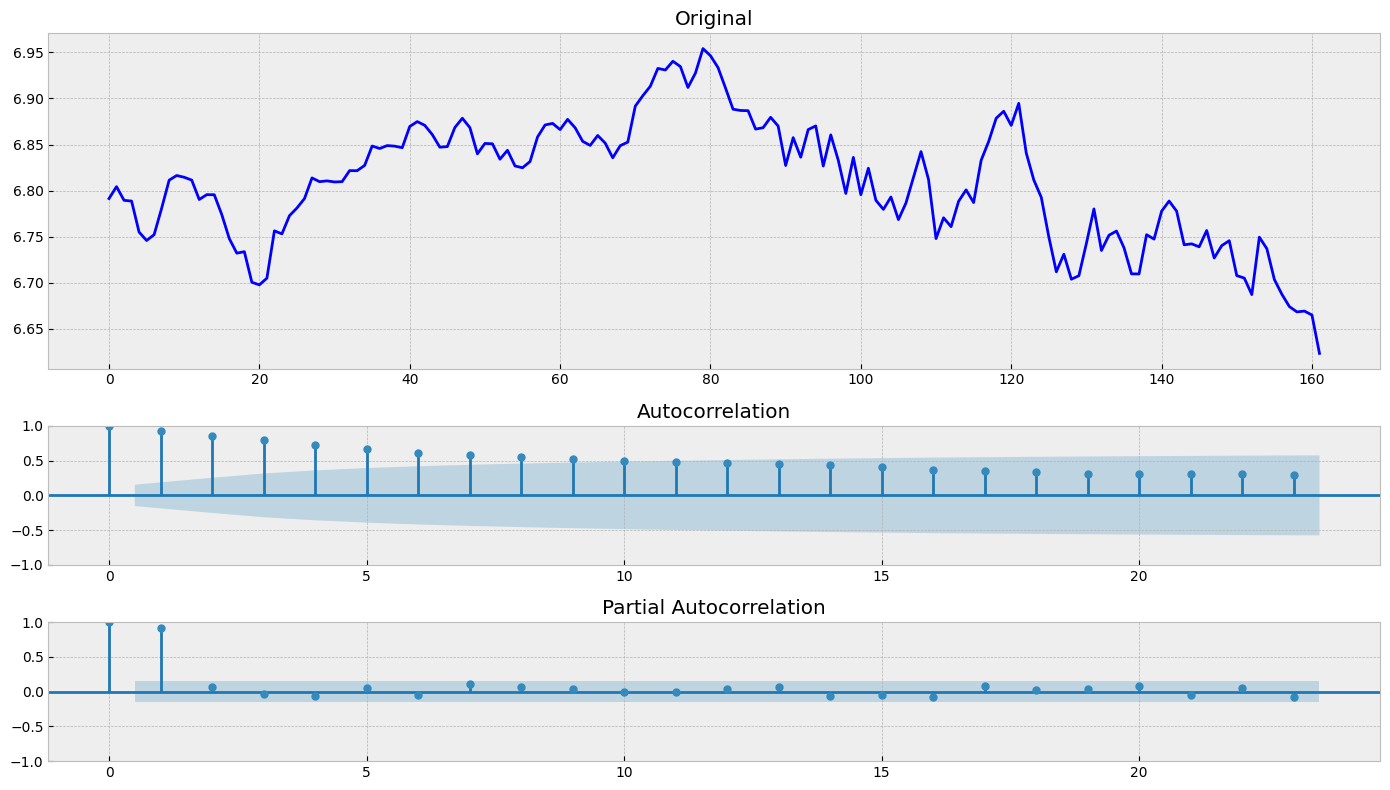

In [11]:
for key, value in time_series.items():
  if key not in good_ts_names:
    series = time_series[key]['Value']
    series = boxcox(series, 0)
    print('-----------------------------------------')
    print(f'{key}')
    print('-----------------------------------------')
    time_series[key]['Value'] = time_series[key]['Value'].apply(lambda x: boxcox(x,0))
    if tsplot(series):
      good_ts_names.append(key)



In [12]:
good_ts_names

['daily-total-female-births-in-cal.csv',
 'mean-monthly-air-temperature-deg.csv']

Вывод: С помощью преобразования Бокса-Кокса удалось привести к стационарности временной ряд Среднемесячные значения температуры на всех уровнях значимости. Коррелограммы остальных временных рядов свидетельствуют о том, что там есть тренд и сезонность, от которых следует избавиться

# 4. Удаление тренда и повторная проверка гипотезы о стационарности


-----------------------------------------
international-airline-passengers.csv
-----------------------------------------
Results of Dickey-Fuller Test:
Не отвергаем нулевую гипотезу, на уровне значимости 1% ряд, вероятно, нестационарен
Не отвергаем нулевую гипотезу, на уровне значимости 5% ряд, вероятно, нестационарен
Отвергаем нулевую гипотезу, на уровне значимости 10% ряд можно считать стационарным
Вывод: ряд, вероятно, нестационарен
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64
-----------------------------------------
monthly-boston-armed-robberies-j.csv
-----------------------------------------
Results of Dickey-Fuller Test:
Отвергаем нулевую гипотезу, на уровне значимости 1% ряд можно считать стационарным
Отвергаем нулеву

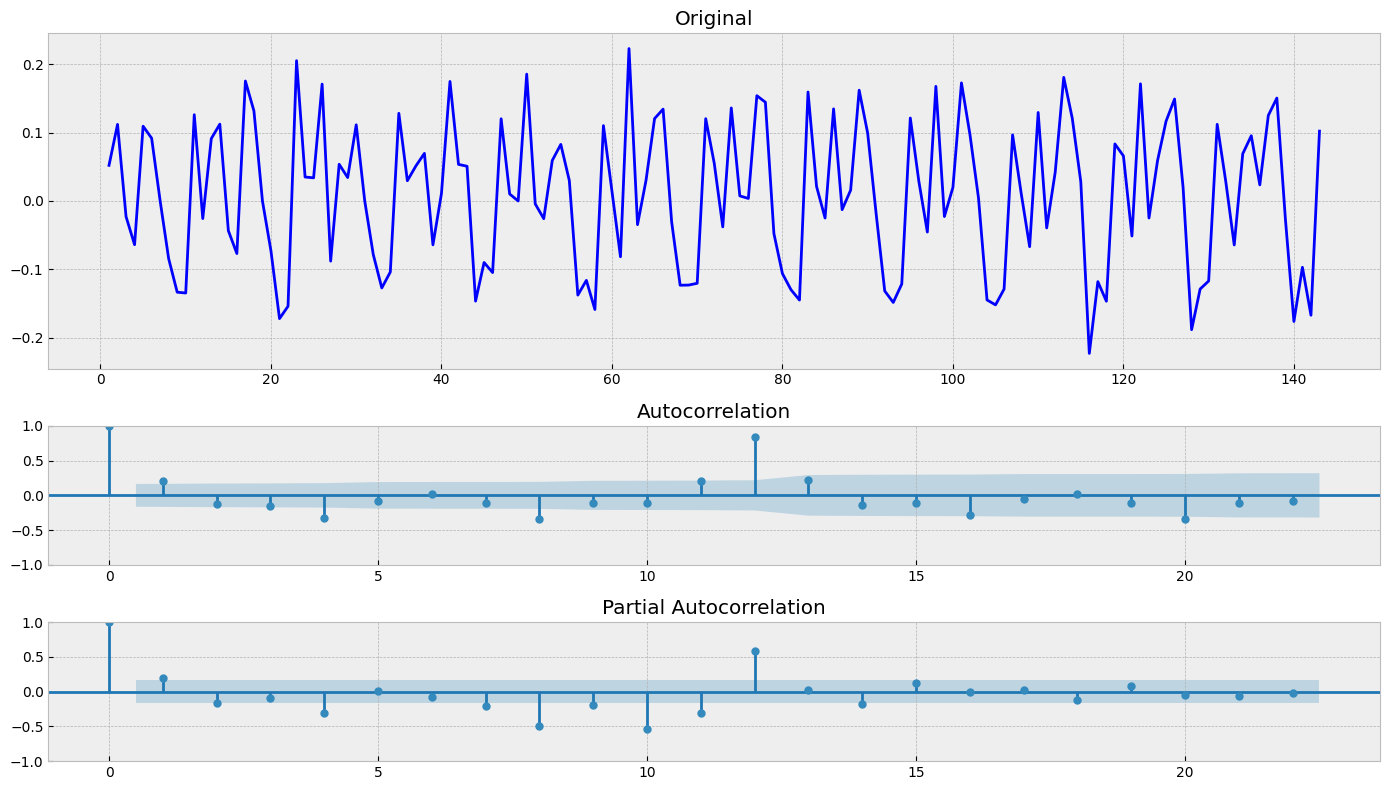

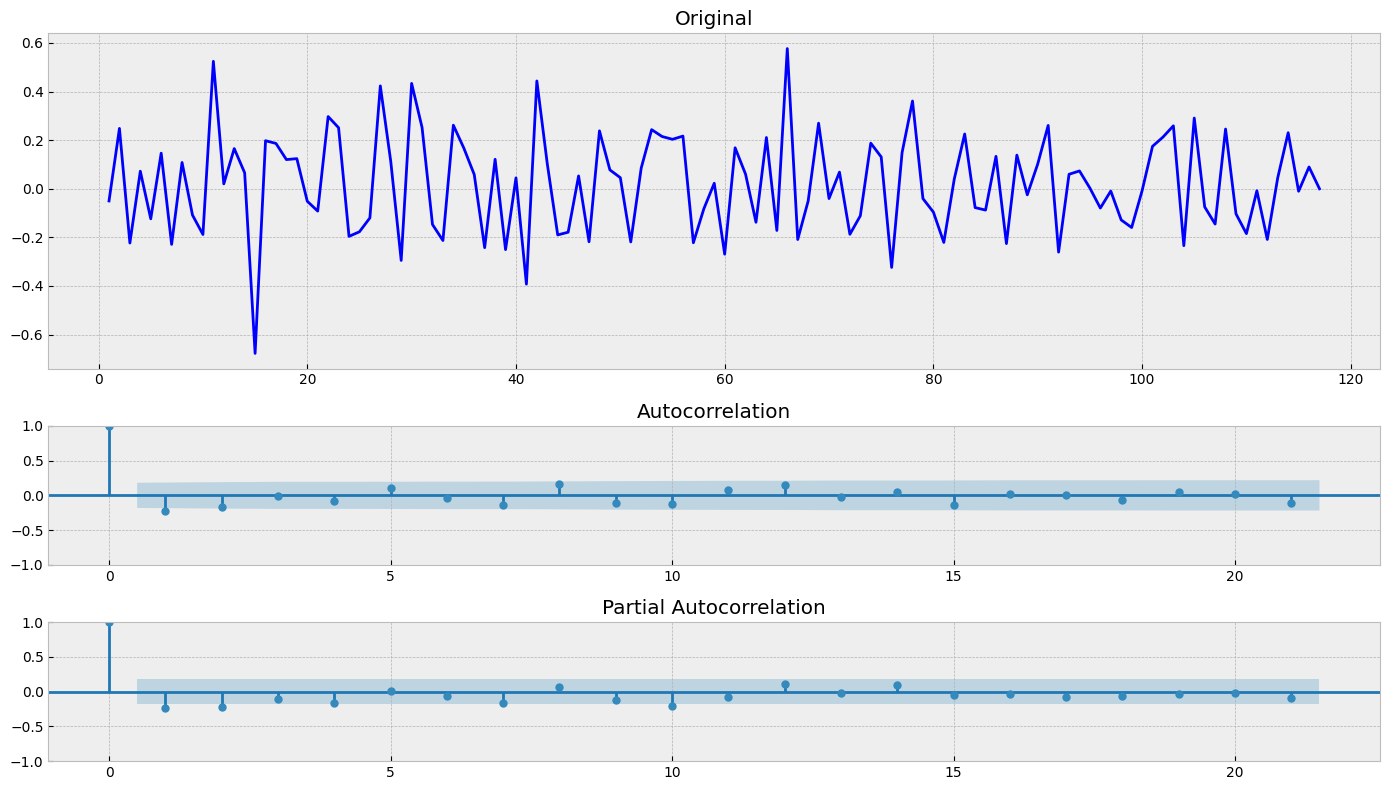

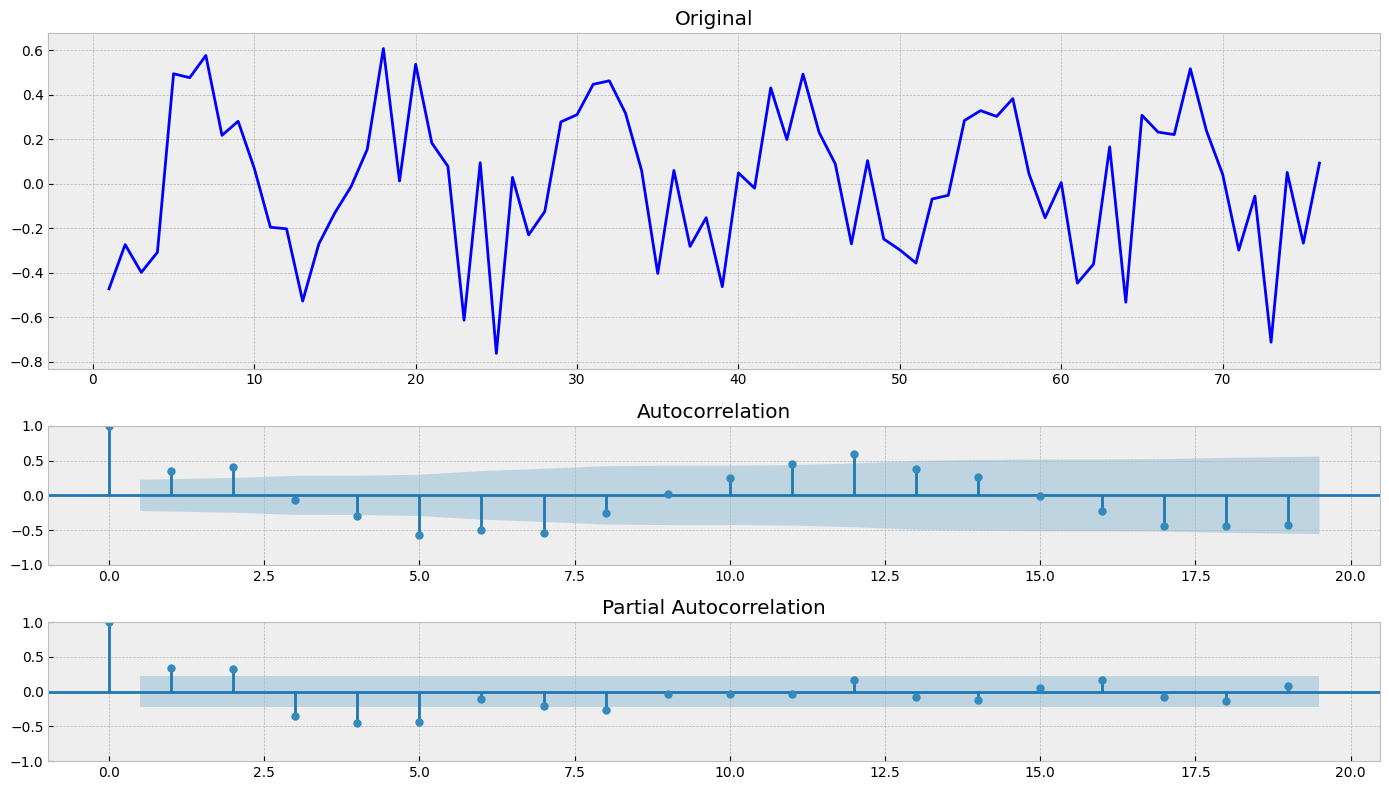

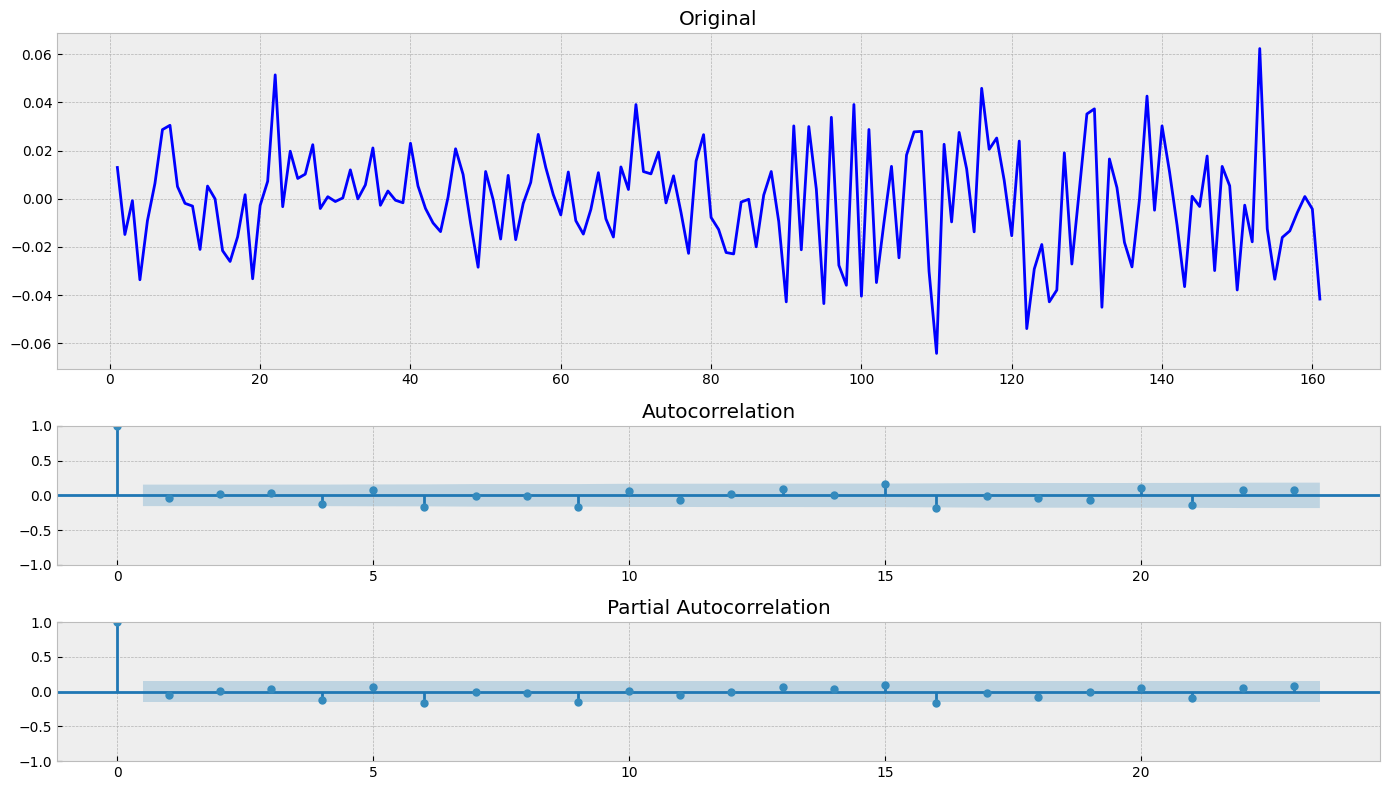

In [13]:
# Лаг = 1
for key, value in time_series.items():
  if key not in good_ts_names:
    series = time_series[key]['Value']
    series = series.diff(1)
    series.dropna(inplace=True)
    print('-----------------------------------------')
    print(f'{key}')
    print('-----------------------------------------')
    if tsplot(series):
      good_ts_names.append(key)
      pass
    time_series[key]['Value'] = time_series[key]['Value'].diff(1)
    time_series[key].dropna(inplace=True)

In [14]:
good_ts_names

['daily-total-female-births-in-cal.csv',
 'mean-monthly-air-temperature-deg.csv',
 'monthly-boston-armed-robberies-j.csv',
 'weekly-closings-of-the-dowjones-.csv']

Вывод: с помощью дифференцирования с временным лагом=1 удалось устранить тренд и првести к стационарности временные ряды 'monthly-boston-armed-robberies-j.csv', 'weekly-closings-of-the-dowjones-.csv'. В ряду международных перевозок авиапассажиров присутствует сезонность ( лаг=12), которую также следует устранить

# 5. Удаление сезонности и повторная проверка гипотезы о стационарности

-----------------------------------------
international-airline-passengers.csv
-----------------------------------------
Results of Dickey-Fuller Test:
Отвергаем нулевую гипотезу, на уровне значимости 1% ряд можно считать стационарным
Отвергаем нулевую гипотезу, на уровне значимости 5% ряд можно считать стационарным
Отвергаем нулевую гипотезу, на уровне значимости 10% ряд можно считать стационарным
Вывод: отклоняем нулевую гипотезу, ряд стационарен
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64
-----------------------------------------
monthly-sales-of-company-x-jan-6.csv
-----------------------------------------
Results of Dickey-Fuller Test:
Не отвергаем нулевую гипотезу, на уровне значимости 1% ряд, вероятно, нестационарен
Не

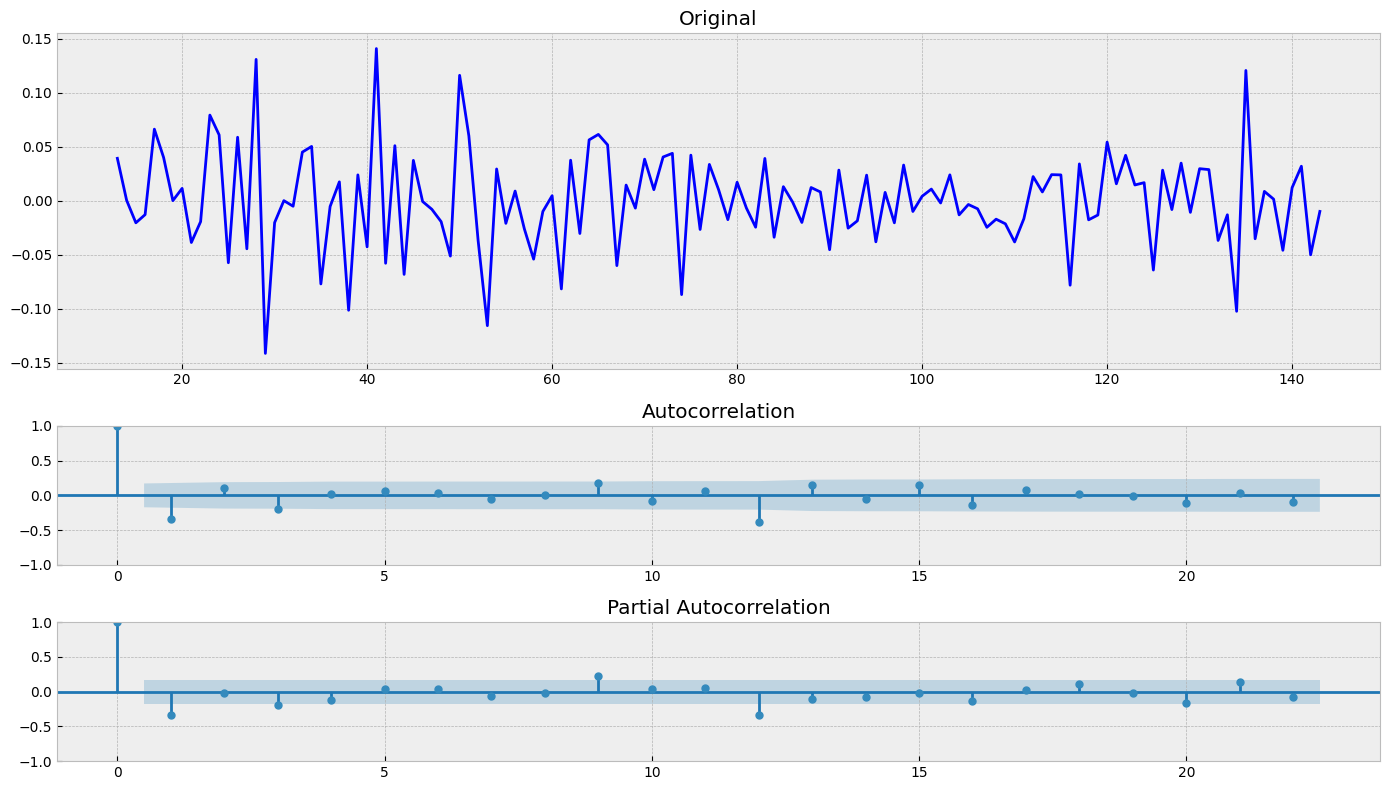

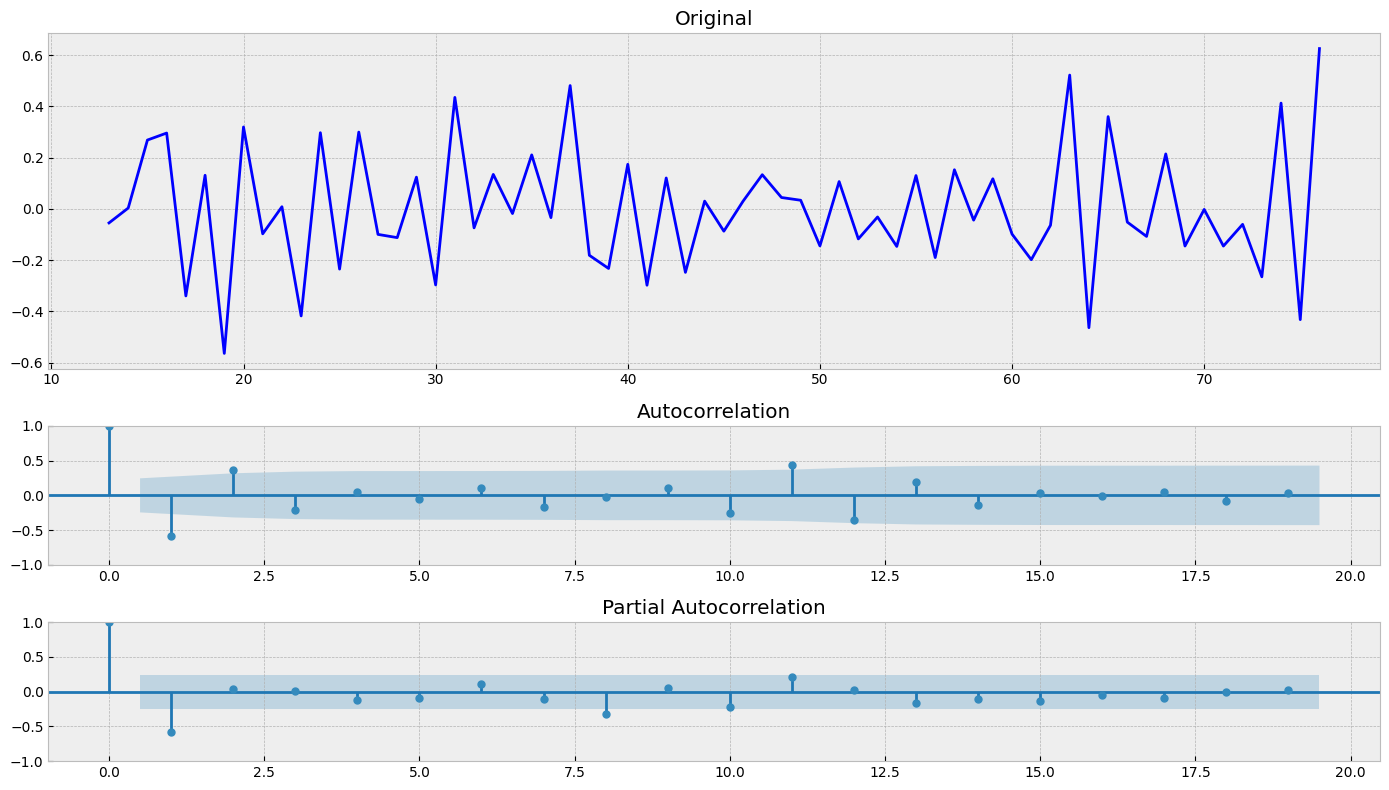

In [15]:
# Лаг = 12
for key, value in time_series.items():
  if key not in good_ts_names:
    series = time_series[key]['Value']
    series = series.diff(12)
    series.dropna(inplace=True)
    print('-----------------------------------------')
    print(f'{key}')
    print('-----------------------------------------')
    if tsplot(series):
      good_ts_names.append(key)
      pass
    time_series[key]['Value'] = time_series[key]['Value'].diff(12)
    time_series[key].dropna(inplace=True)

In [16]:
good_ts_names

['daily-total-female-births-in-cal.csv',
 'mean-monthly-air-temperature-deg.csv',
 'monthly-boston-armed-robberies-j.csv',
 'weekly-closings-of-the-dowjones-.csv',
 'international-airline-passengers.csv']

Удалось добиться стационарности во всех рассмотренных рядах, за исключением monthly-sales-of-company-x-jan-6.csv

-----------------------------------------
monthly-sales-of-company-x-jan-6.csv
-----------------------------------------
Results of Dickey-Fuller Test:
Отвергаем нулевую гипотезу, на уровне значимости 1% ряд можно считать стационарным
Отвергаем нулевую гипотезу, на уровне значимости 5% ряд можно считать стационарным
Отвергаем нулевую гипотезу, на уровне значимости 10% ряд можно считать стационарным
Вывод: отклоняем нулевую гипотезу, ряд стационарен
Test Statistic                 -5.290390
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


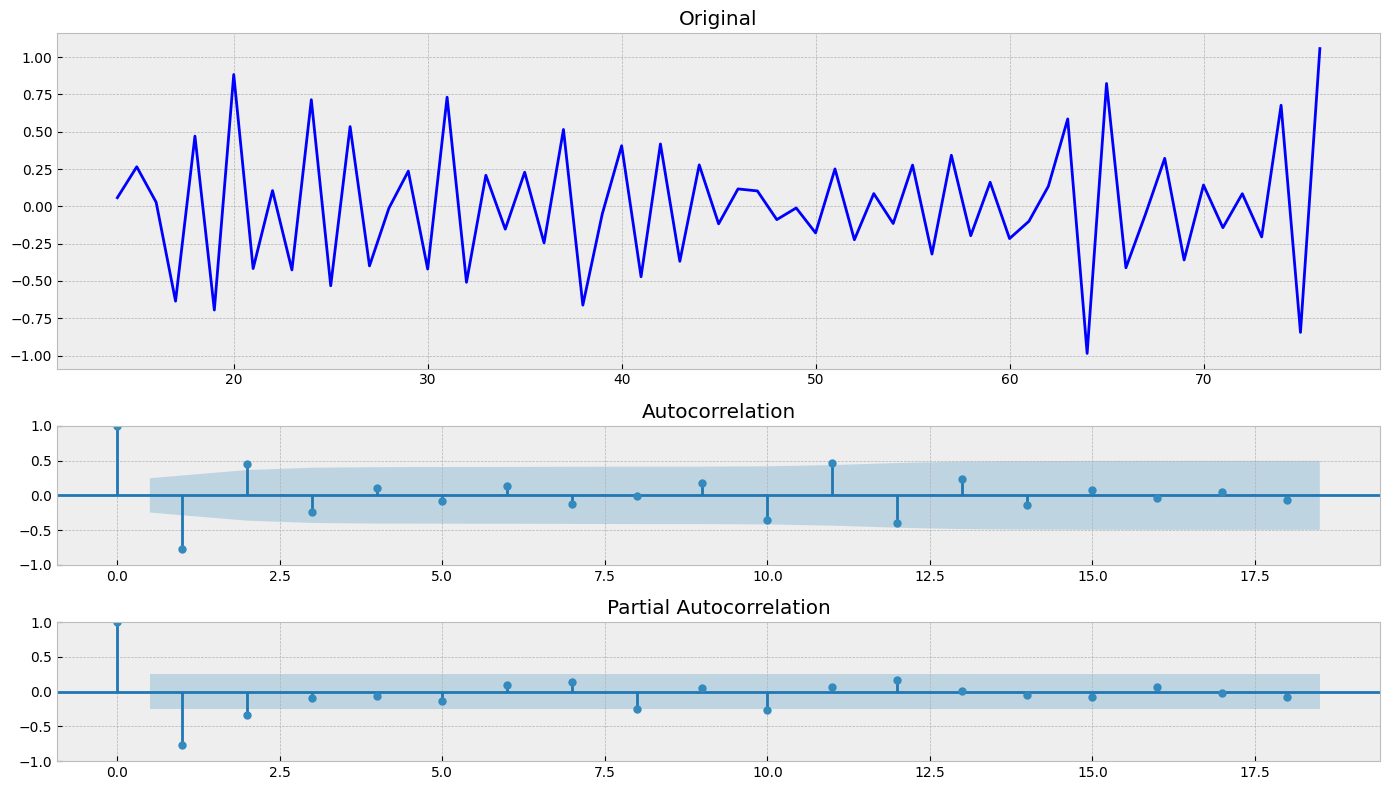

In [17]:
# Лаг = 1
for key, value in time_series.items():
  if key not in good_ts_names:
    series = time_series[key]['Value']
    series = series.diff(1)
    series.dropna(inplace=True)
    print('-----------------------------------------')
    print(f'{key}')
    print('-----------------------------------------')
    if tsplot(series):
      good_ts_names.append(key)
      pass
    time_series[key]['Value'] = time_series[key]['Value'].diff(1)
    time_series[key].dropna(inplace=True)

In [18]:
good_ts_names

['daily-total-female-births-in-cal.csv',
 'mean-monthly-air-temperature-deg.csv',
 'monthly-boston-armed-robberies-j.csv',
 'weekly-closings-of-the-dowjones-.csv',
 'international-airline-passengers.csv',
 'monthly-sales-of-company-x-jan-6.csv']

Вывод: Удалось добиться стационарности во всех рассмотренных временных рядах